In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy  as np 

In [2]:
data=pd.read_csv('BRCA.csv')
data.head()

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   

  Patient_Status  
0          Alive  
1           Dead  
2          Alive  
3          Alive  
4           Dead

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [4]:
data.drop(['Patient_ID'],axis=1 ,inplace=True)

In [5]:
data.head()

Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680          III   
1  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505           II   
2  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260          III   
3  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270           II   
4  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990           II   

                       Histology ER status PR status HER2 status  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1             Mucinous Carcinoma  Positive  Positive    Negative   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   

  Patient_Status  
0          Alive  
1           Dead  
2          Alive  
3          Alive  
4           Dead

In [6]:
data.isna().sum()

Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [7]:
data.duplicated().sum()

6

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(335, 15)

In [10]:
data.isna().sum()

Age                    1
Gender                 1
Protein1               1
Protein2               1
Protein3               1
Protein4               1
Tumour_Stage           1
Histology              1
ER status              1
PR status              1
HER2 status            1
Surgery_type           1
Date_of_Surgery        1
Date_of_Last_Visit    18
Patient_Status        14
dtype: int64

#### Split Date_of_Surgery column into day,month,year columns

In [11]:
data[["day_of_Surgery", "month_of_Surgery", "year_of_Surgery"]] = data["Date_of_Surgery"].str.split("-", expand = True)

In [12]:
data.head()

Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680          III   
1  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505           II   
2  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260          III   
3  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270           II   
4  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990           II   

                       Histology ER status PR status HER2 status  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1             Mucinous Carcinoma  Positive  Positive    Negative   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   

  Patient_Status day_of_Surgery month_of_Surgery year_of_Surgery  
0          Alive             15              Jan              17  
1           Dead             26              Apr              17  
2          Alive             08              Sep              17  
3          Alive             25              Jan              17  
4           Dead             06              May              17

### split Date_of_Last_Visit column into day,month,year columns

In [13]:
data[['day_of_Last_Visit','month_of_Last_Visit','year_of_Last_Visit']]=data['Date_of_Last_Visit'].str.split('-',expand=True)

In [14]:
data.head()

Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680          III   
1  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505           II   
2  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260          III   
3  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270           II   
4  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990           II   

                       Histology ER status PR status  ...  \
0  Infiltrating Ductal Carcinoma  Positive  Positive  ...   
1             Mucinous Carcinoma  Positive  Positive  ...   
2  Infiltrating Ductal Carcinoma  Positive  Positive  ...   
3  Infiltrating Ductal Carcinoma  Positive  Positive  ...   
4  Infiltrating Ductal Carcinoma  Positive  Positive  ...   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   

  Patient_Status day_of_Surgery month_of_Surgery year_of_Surgery  \
0          Alive             15              Jan              17   
1           Dead             26              Apr              17   
2          Alive             08              Sep              17   
3          Alive             25              Jan              17   
4           Dead             06              May              17   

  day_of_Last_Visit month_of_Last_Visit year_of_Last_Visit  
0                19                 Jun                 17  
1                09                 Nov                 18  
2                09                 Jun                 18  
3                12                 Jul                 17  
4                27                 Jun                 19  

[5 rows x 21 columns]

### Afte spliting date columns(Date_of_Surgery , Date_of_Last_Visit) , delete them

In [15]:
data.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [16]:
data.describe()

Age    Protein1    Protein2    Protein3    Protein4
count  334.000000  334.000000  334.000000  334.000000  334.000000
mean    58.886228   -0.029991    0.946896   -0.090204    0.009819
std     12.961212    0.563588    0.911637    0.585175    0.629055
min     29.000000   -2.340900   -0.978730   -1.627400   -2.025500
25%     49.000000   -0.358888    0.362173   -0.513748   -0.377090
50%     58.000000    0.006129    0.992805   -0.173180    0.041768
75%     68.000000    0.343598    1.627900    0.278353    0.425630
max     90.000000    1.593600    3.402200    2.193400    1.629900

### ER status , PR status have constant value ( from desription max = min),so i dropped it 

In [17]:
data.drop(['ER status','PR status'],axis=1,inplace=True)

In [18]:
data.head()

Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680          III   
1  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505           II   
2  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260          III   
3  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270           II   
4  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990           II   

                       Histology HER2 status                 Surgery_type  \
0  Infiltrating Ductal Carcinoma    Negative  Modified Radical Mastectomy   
1             Mucinous Carcinoma    Negative                   Lumpectomy   
2  Infiltrating Ductal Carcinoma    Negative                        Other   
3  Infiltrating Ductal Carcinoma    Negative  Modified Radical Mastectomy   
4  Infiltrating Ductal Carcinoma    Negative                        Other   

  Patient_Status day_of_Surgery month_of_Surgery year_of_Surgery  \
0          Alive             15              Jan              17   
1           Dead             26              Apr              17   
2          Alive             08              Sep              17   
3          Alive             25              Jan              17   
4           Dead             06              May              17   

  day_of_Last_Visit month_of_Last_Visit year_of_Last_Visit  
0                19                 Jun                 17  
1                09                 Nov                 18  
2                09                 Jun                 18  
3                12                 Jul                 17  
4                27                 Jun                 19

In [19]:
data.isna().sum()

Age                     1
Gender                  1
Protein1                1
Protein2                1
Protein3                1
Protein4                1
Tumour_Stage            1
Histology               1
HER2 status             1
Surgery_type            1
Patient_Status         14
day_of_Surgery          1
month_of_Surgery        1
year_of_Surgery         1
day_of_Last_Visit      18
month_of_Last_Visit    18
year_of_Last_Visit     18
dtype: int64

### Fill nan values 

In [20]:
from sklearn.impute import SimpleImputer


for col in data.columns:
    
    if data[col].dtype=='object':
        s=SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
        data[col]=s.fit_transform(data.loc[:,col].values.reshape(-1,1))

        
    else:
        s=SimpleImputer(missing_values=np.nan ,strategy='median')
        data[col]=s.fit_transform(data.loc[:,col].values.reshape(-1,1))
    

In [21]:
data.isna().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
HER2 status            0
Surgery_type           0
Patient_Status         0
day_of_Surgery         0
month_of_Surgery       0
year_of_Surgery        0
day_of_Last_Visit      0
month_of_Last_Visit    0
year_of_Last_Visit     0
dtype: int64

### here age is a float type so i converted it to int to save more memory

In [22]:
data['Age']=data['Age'].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  335 non-null    int32  
 1   Gender               335 non-null    object 
 2   Protein1             335 non-null    float64
 3   Protein2             335 non-null    float64
 4   Protein3             335 non-null    float64
 5   Protein4             335 non-null    float64
 6   Tumour_Stage         335 non-null    object 
 7   Histology            335 non-null    object 
 8   HER2 status          335 non-null    object 
 9   Surgery_type         335 non-null    object 
 10  Patient_Status       335 non-null    object 
 11  day_of_Surgery       335 non-null    object 
 12  month_of_Surgery     335 non-null    object 
 13  year_of_Surgery      335 non-null    object 
 14  day_of_Last_Visit    335 non-null    object 
 15  month_of_Last_Visit  335 non-null    obj

### Count Target ( unbalanced data)

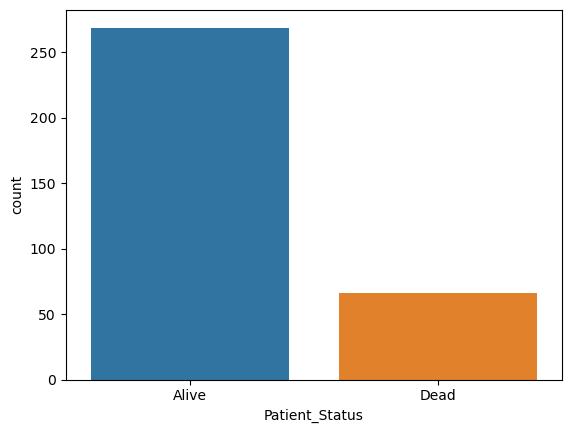

In [24]:
sns.countplot(x='Patient_Status',data=data)
plt.show()

### Label Encoding

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in data.columns:
    if data[col].dtype=='object':
            data[col]=le.fit_transform(data.loc[:,col].values)
    else:
        pass

In [26]:
data.head()

Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0   36       0  0.080353   0.42638   0.54715  0.273680             2   
1   43       0 -0.420320   0.57807   0.61447 -0.031505             1   
2   69       0  0.213980   1.31140  -0.32747 -0.234260             2   
3   56       0  0.345090  -0.21147  -0.19304  0.124270             1   
4   56       0  0.221550   1.90680   0.52045 -0.311990             1   

   Histology  HER2 status  Surgery_type  Patient_Status  day_of_Surgery  \
0          0            0             1               0              14   
1          2            0             0               1              25   
2          0            0             2               0               7   
3          0            0             1               0              24   
4          0            0             2               1               5   

   month_of_Surgery  year_of_Surgery  day_of_Last_Visit  month_of_Last_Visit  \
0                 4                0                 18                    6   
1                 0                0                  8                    9   
2                11                0                  8                    6   
3                 4                0                 11                    5   
4                 8                0                 26                    6   

   year_of_Last_Visit  
0                   0  
1                   1  
2                   1  
3                   0  
4                   2

In [27]:
data.shape

(335, 17)

### Visualization

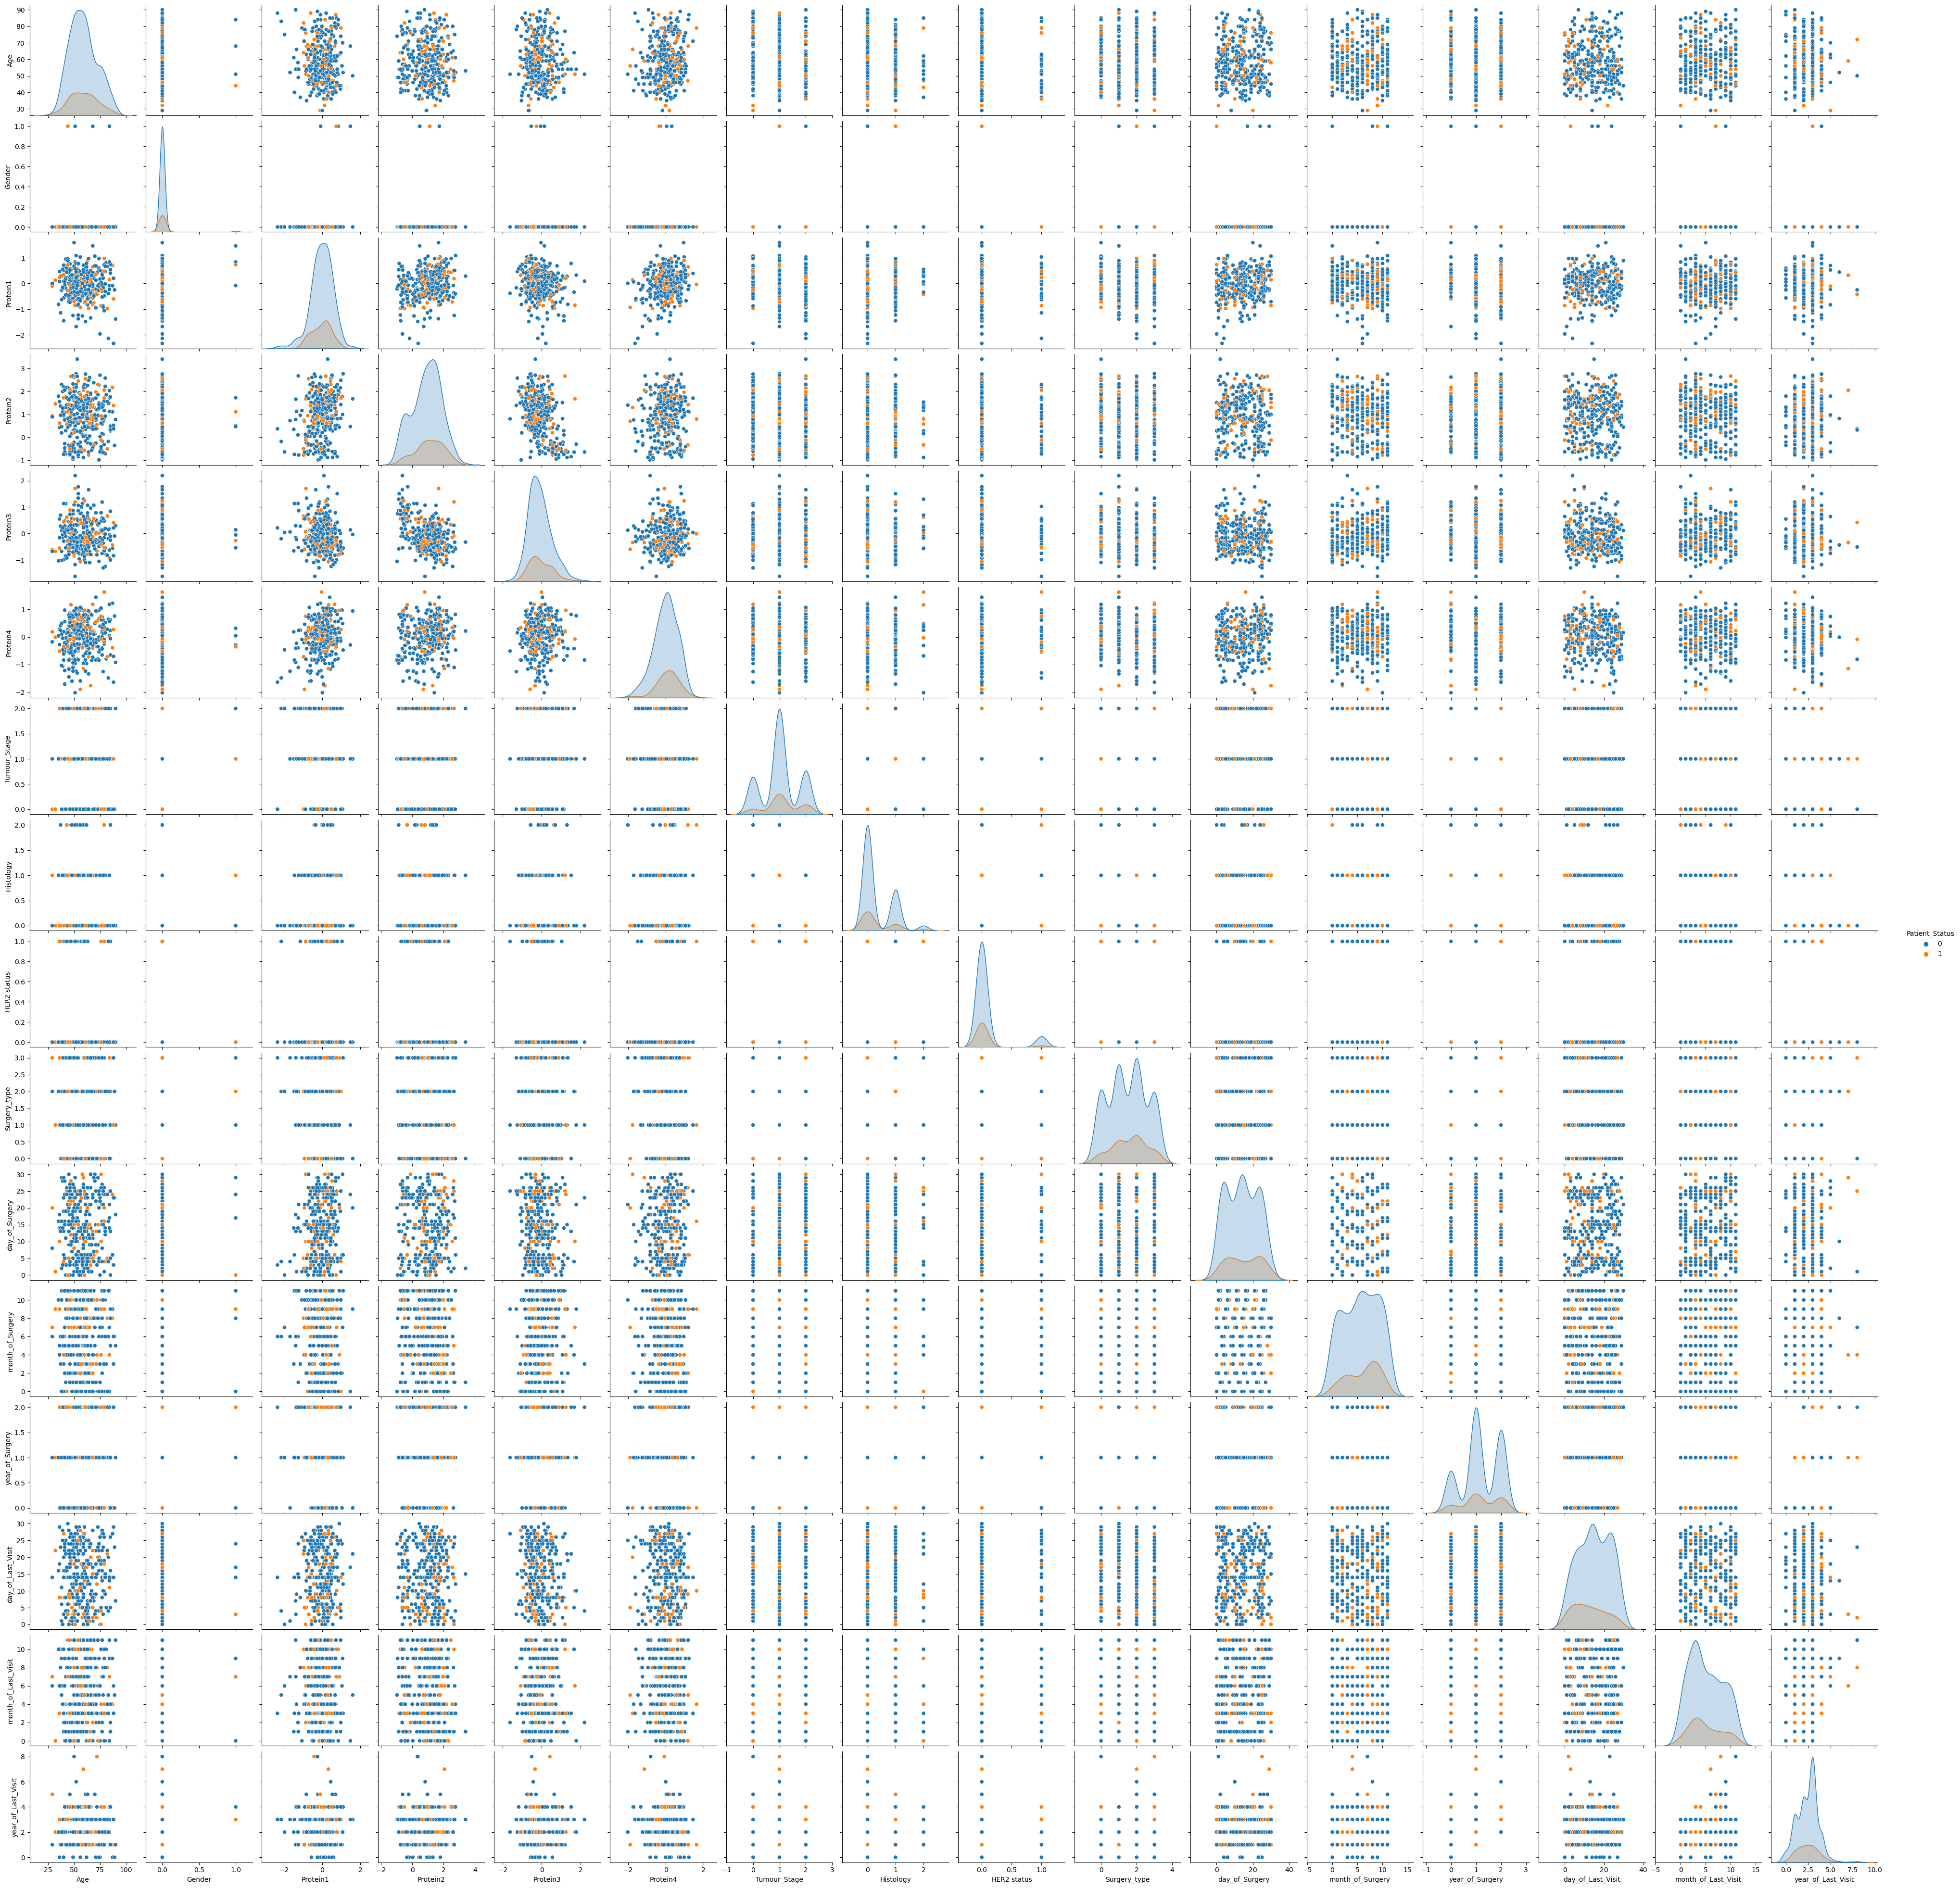

In [116]:
sns.pairplot(data,kind='scatter',hue='Patient_Status')
plt.show()

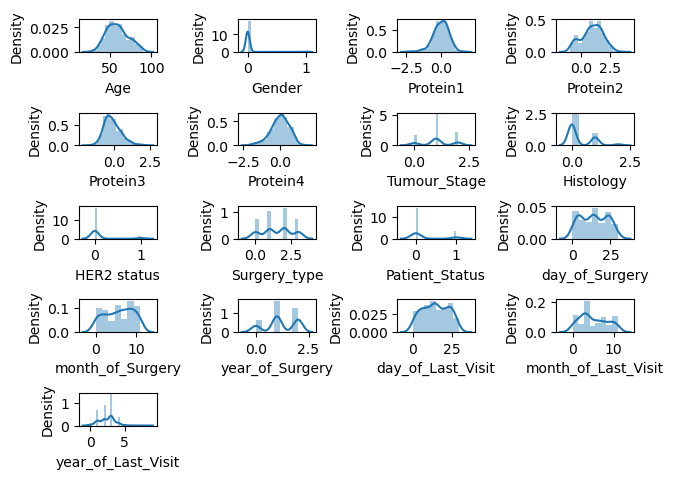

In [117]:
import warnings
warnings.filterwarnings('ignore')
i=1
for col in data.columns:
    plt.subplot(5,4,i)
    sns.distplot(data[col])
    i+=1
plt.tight_layout(pad=0.9)
plt.show()

In [28]:
def outliers(data,col):
    m=data[col].mean()
    sd=data[col].std()
    outliers=[]
    for i in range(len(data)):
        if data.loc[i,col]> (m+3*sd) or data.loc[i,col] < (m-3*sd):
            outliers.append(data.loc[i,col])
            
    print ("outlier in col ", col ,':', outliers)

In [29]:
columns=list(data.columns)
for col in columns:
    outliers(data,col)

outlier in col  Age : []
outlier in col  Gender : [1, 1, 1, 1]
outlier in col  Protein1 : [-2.1446, -1.9711, -2.3409]
outlier in col  Protein2 : []
outlier in col  Protein3 : [1.7019, 1.7691, 2.1934]
outlier in col  Protein4 : [-2.0255, -1.8993]
outlier in col  Tumour_Stage : []
outlier in col  Histology : [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
outlier in col  HER2 status : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
outlier in col  Surgery_type : []
outlier in col  Patient_Status : []
outlier in col  day_of_Surgery : []
outlier in col  month_of_Surgery : []
outlier in col  year_of_Surgery : []
outlier in col  day_of_Last_Visit : []
outlier in col  month_of_Last_Visit : []
outlier in col  year_of_Last_Visit : [8, 7, 8]


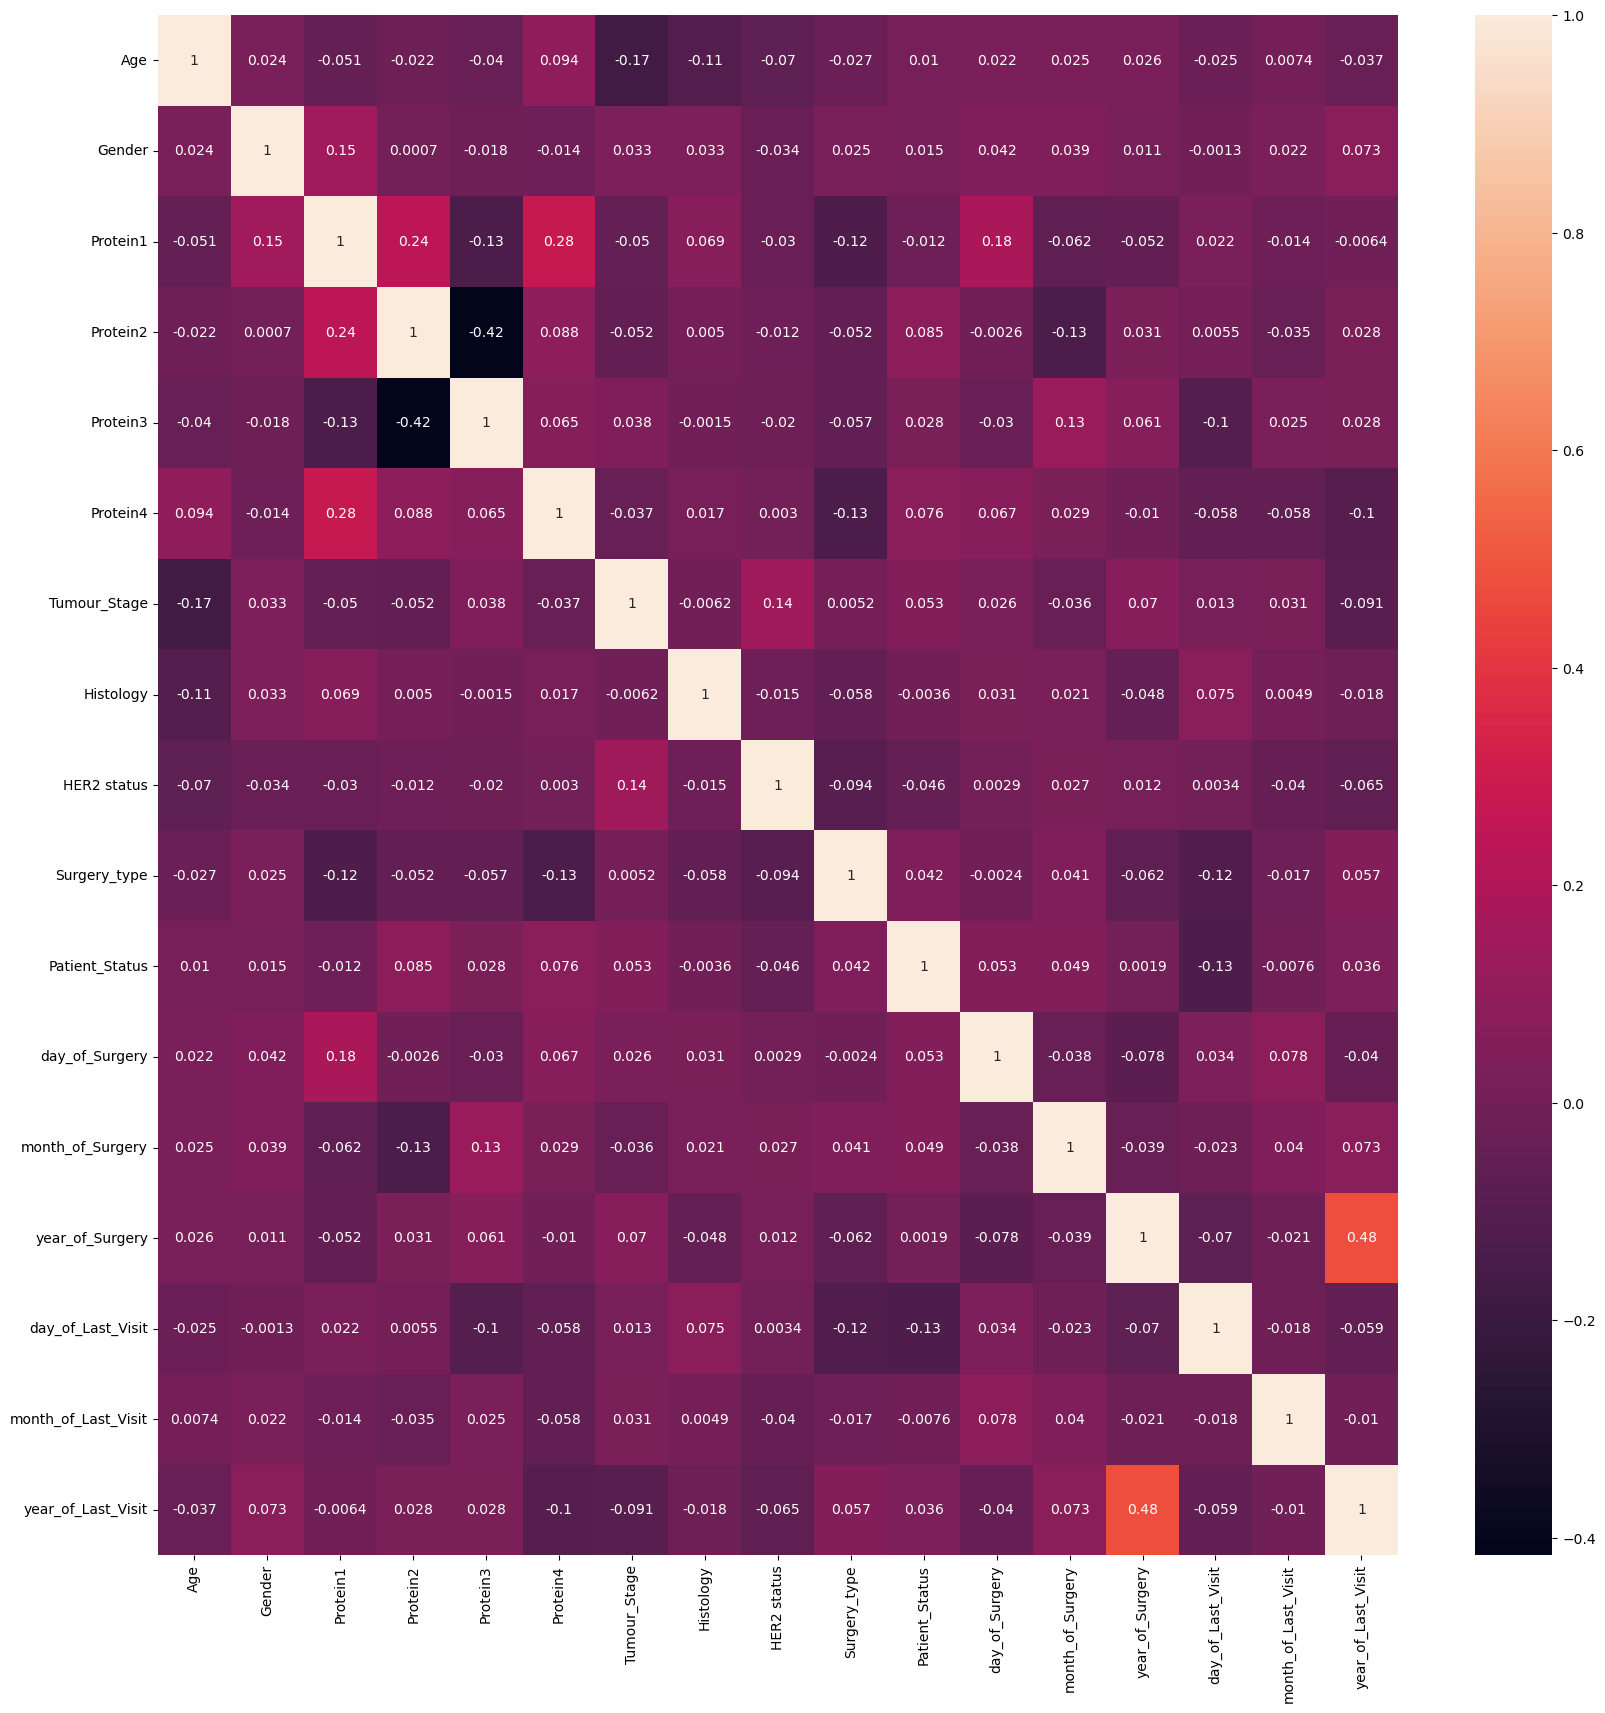

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Split Data

In [81]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [82]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.1)

In [83]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_X=sd.fit_transform(train_X)
test_X=sd.transform(test_X)

In [84]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()       
model.fit(train_X,train_y)

LogisticRegression()

#### evaluation on test

In [85]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(test_X)
print('Confusion Matrix:',confusion_matrix(y_pred,test_y))

Confusion Matrix: [[0 0 0 0 0]
 [1 4 0 1 0]
 [0 0 0 5 1]
 [0 3 6 9 4]
 [0 0 0 0 0]]


In [86]:
from sklearn.metrics import recall_score , accuracy_score , f1_score ,precision_score
print('Accuracy : ',accuracy_score(test_y ,y_pred))
print('Recall: ',recall_score(test_y ,y_pred,average='weighted'))
print('Precision' ,precision_score(test_y ,y_pred,average='weighted'))
print('F1 Score: ',f1_score(test_y ,y_pred,average='weighted'))

Accuracy :  0.38235294117647056
Recall:  0.38235294117647056
Precision 0.3177361853832442
F1 Score:  0.34132322367616486


#### evaluation on train

In [87]:
y_pred=model.predict(train_X)
print('Confusion Matrix:',confusion_matrix(y_pred,train_y))

Confusion Matrix: [[ 3  0  0  0  0  0  0  0  0]
 [ 7 29  6 10  2  1  0  0  0]
 [ 0 10 34 16  3  0  0  1  1]
 [ 0 18 37 86 19  2  1  0  1]
 [ 0  0  1  2  8  0  0  0  0]
 [ 0  0  0  1  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


In [88]:
print('Accuracy : ',accuracy_score(train_y ,y_pred))
print('Recall: ',recall_score(train_y ,y_pred,average='weighted'))
print('Precision' ,precision_score(train_y ,y_pred,average='weighted'))
print('F1 Score: ',f1_score(train_y,y_pred,average='weighted'))

Accuracy :  0.5382059800664452
Recall:  0.5382059800664452
Precision 0.5573604123235433
F1 Score:  0.5200238702359041
